In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
filtered_count_data = pd.read_csv('/content/filtered_count_data (1).csv')
filtered_count_data

,gene_id,NBS1_read,NBS2,NBS3,26,IP2-53,56_s,83,171,IP2-42,IP2-48,IP2-49,IP2-65,IP2-66,IP2-71,IP2-50,IP2-76,IP2-78,IP2-83,IP2-90
0,ENSG00000000460,92.85,132.39,100.79,565.69,137.22,266.74,323.21,218.02,419.74,174.40,166.40,161.78,159.57,122.53,251.96,106.50,110.94,120.97,186.54
1,ENSG00000001460,165.00,118.00,181.00,89.04,21.00,35.03,45.00,34.03,244.11,104.02,112.00,77.00,144.00,83.00,94.15,111.17,67.00,86.03,66.00
2,ENSG00000001631,500.11,663.85,905.08,1406.61,234.81,1615.44,644.52,668.58,925.64,526.54,597.66,689.33,554.40,615.82,751.80,436.21,340.51,344.46,507.72
3,ENSG00000002549,2224.00,2505.00,1798.00,931.00,370.00,1370.99,372.00,955.00,2719.78,1223.99,1160.99,703.98,1269.98,926.00,3262.97,1070.97,1634.00,1028.00,1212.00
4,ENSG00000002746,25.00,16.00,29.00,1.00,4.00,10.00,5.00,3.00,10.00,26.00,20.00,40.00,17.00,10.00,25.00,60.00,32.00,22.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,ENSG00000291195,2.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,5.00,3.47,5.00,10.38,12.00,2.00,6.24,33.45,1.89,2.53,9.00
4045,ENSG00000291206,2.28,1.00,0.00,2.00,0.00,2.00,0.00,1.00,5.00,5.00,5.00,11.00,6.00,5.00,10.00,17.00,2.00,1.00,14.00
4046,ENSG00000291232,27.00,17.00,21.00,80.00,2.00,36.00,97.68,48.00,46.00,21.14,19.52,88.47,32.33,7.41,17.00,17.47,10.00,13.00,6.00
4047,ENSG00000291300,21.82,7.06,6.00,1.00,7.00,3.00,2.00,6.00,11.00,21.00,24.00,16.00,22.00,7.00,14.00,44.00,4.00,11.00,8.00


In [ ]:
col_data = pd.read_csv('/content/col_data.csv')
col_data

,Sample,Conditions
0,NBS1_read,Normal Human Breast Organoids
1,NBS2,Normal Human Breast Organoids
2,NBS3,Normal Human Breast Organoids
3,26,HER2 Positive Breast Tumor
4,IP2-53,HER2 Positive Breast Tumor
5,56_s,HER2 Positive Breast Tumor
6,83,HER2 Positive Breast Tumor
7,171,HER2 Positive Breast Tumor
8,IP2-42,Non-TNBC Breast Tumor
9,IP2-48,Non-TNBC Breast Tumor


In [ ]:
# Transpose the filtered_count_data dataframe
filtered_count_data_transposed = filtered_count_data.T
filtered_count_data_transposed.reset_index(inplace=True)
filtered_count_data_transposed.columns = filtered_count_data_transposed.iloc[0] # Set the first row as column header
filtered_count_data_transposed = filtered_count_data_transposed.drop(filtered_count_data_transposed.index[0]) # Drop the first row


conditions = col_data[['Conditions']] # Extract 'Conditions' column to append it later
merged_df = pd.merge(col_data.drop(columns=['Conditions']), filtered_count_data_transposed, left_on='Sample', right_on='gene_id', how='right')
merged_df_final = pd.concat([merged_df, conditions], axis=1) # Append 'Conditions' column at the end


In [ ]:
merged_df_final

,Sample,gene_id,ENSG00000000460,ENSG00000001460,ENSG00000001631,ENSG00000002549,ENSG00000002746,ENSG00000003147,ENSG00000003987,ENSG00000003989,...,ENSG00000291139,ENSG00000291145,ENSG00000291146,ENSG00000291153,ENSG00000291195,ENSG00000291206,ENSG00000291232,ENSG00000291300,ENSG00000292354,Conditions
0,NBS1_read,NBS1_read,92.85,165.0,500.11,2224.0,25.0,1129.0,19.2,5793.0,...,3.04,24.2,122.56,107.0,2.0,2.28,27.0,21.82,2.0,Normal Human Breast Organoids
1,NBS2,NBS2,132.39,118.0,663.85,2505.0,16.0,1272.0,24.63,5865.0,...,16.14,17.0,61.59,109.0,0.0,1.0,17.0,7.06,0.5,Normal Human Breast Organoids
2,NBS3,NBS3,100.79,181.0,905.08,1798.0,29.0,1194.0,42.09,8144.0,...,12.25,9.08,84.74,83.0,0.0,0.0,21.0,6.0,0.0,Normal Human Breast Organoids
3,26,26,565.69,89.04,1406.61,931.0,1.0,91.0,153.92,31.0,...,8.64,2.0,33.99,193.04,0.0,2.0,80.0,1.0,0.0,HER2 Positive Breast Tumor
4,IP2-53,IP2-53,137.22,21.0,234.81,370.0,4.0,249.0,17.91,365.0,...,1.0,2.0,16.29,48.0,1.29,0.0,2.0,7.0,0.5,HER2 Positive Breast Tumor
5,56_s,56_s,266.74,35.03,1615.44,1370.99,10.0,271.0,57.26,187.0,...,12.39,8.01,15.96,114.63,0.0,2.0,36.0,3.0,0.0,HER2 Positive Breast Tumor
6,83,83,323.21,45.0,644.52,372.0,5.0,520.0,40.89,276.0,...,5.0,3.0,5.45,90.38,0.0,0.0,97.68,2.0,0.0,HER2 Positive Breast Tumor
7,171,171,218.02,34.03,668.58,955.0,3.0,194.0,60.25,629.0,...,10.1,6.0,10.21,104.8,0.0,1.0,48.0,6.0,0.0,HER2 Positive Breast Tumor
8,IP2-42,IP2-42,419.74,244.11,925.64,2719.78,10.0,961.0,542.85,3928.0,...,28.09,13.0,92.24,95.05,5.0,5.0,46.0,11.0,2.0,Non-TNBC Breast Tumor
9,IP2-48,IP2-48,174.4,104.02,526.54,1223.99,26.0,401.0,113.37,4821.0,...,27.0,17.0,42.79,75.59,3.47,5.0,21.14,21.0,5.0,Non-TNBC Breast Tumor


In [ ]:
data = merged_df_final.iloc[:, 1:] #drops the Sample column of the merged dataframe

In [ ]:
data.describe()

,gene_id,ENSG00000000460,ENSG00000001460,ENSG00000001631,ENSG00000002549,ENSG00000002746,ENSG00000003147,ENSG00000003987,ENSG00000003989,ENSG00000004399,...,ENSG00000291139,ENSG00000291145,ENSG00000291146,ENSG00000291153,ENSG00000291195,ENSG00000291206,ENSG00000291232,ENSG00000291300,ENSG00000292354,Conditions
count,19,19.00,19.0,19.00,19.0,19.0,19.0,19.0,19.0,19.0,...,19.00,19.0,19.00,19.0,19.0,19.0,19.0,19.0,19.0,19
unique,19,19.00,19.0,19.00,19.0,16.0,19.0,19.0,19.0,19.0,...,19.00,17.0,19.00,19.0,12.0,10.0,18.0,16.0,8.0,4
top,NBS1_read,92.85,165.0,500.11,2224.0,10.0,1129.0,19.2,5793.0,1187.0,...,3.04,2.0,122.56,107.0,0.0,5.0,17.0,6.0,2.0,Non-TNBC Breast Tumor
freq,1,1.00,1.0,1.00,1.0,3.0,1.0,1.0,1.0,1.0,...,1.00,2.0,1.00,1.0,6.0,4.0,2.0,2.0,5.0,6


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Exclude non-numerical columns
numerical_data = data.drop(columns=['gene_id', 'Conditions'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Perform PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
principal_components = pca.fit_transform(scaled_data)

# Number of components chosen
num_components = pca.n_components_

# Variance explained by each of the selected components
explained_variance = pca.explained_variance_ratio_

num_components, explained_variance


(14,
 array([0.32032637, 0.23110691, 0.09276829, 0.0589627 , 0.0501294 ,
        0.03126819, 0.03065538, 0.02734175, 0.02360679, 0.0211517 ,
        0.01729431, 0.01651954, 0.01624077, 0.01568515]))

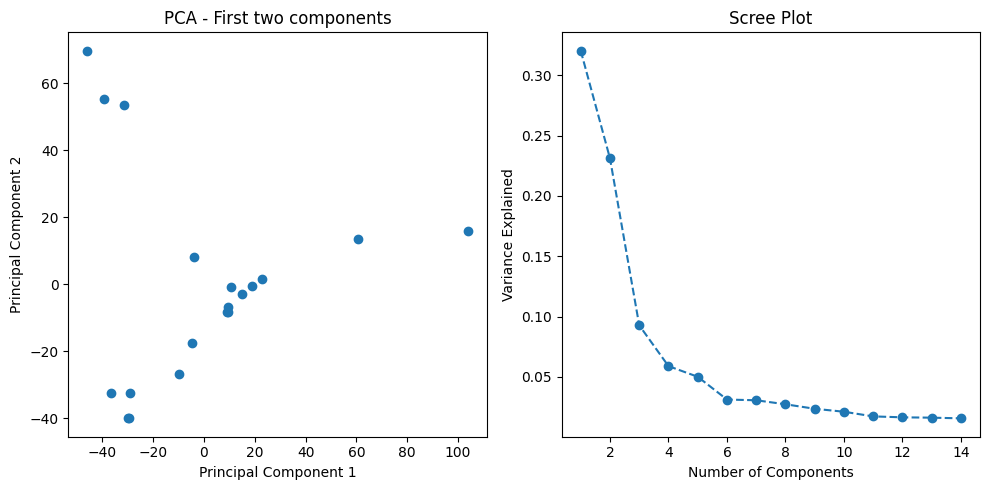

In [ ]:
# Scatter Plot of the First Two Principal Components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA - First two components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Scree Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_components + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Prepare the features (PCA components) and labels
X = principal_components  # PCA-reduced data
y = data['Conditions'].values

# Initialize the SVM model with a linear kernel
svm_model = SVC(kernel='linear', C=1)

# Train the SVM model on the entire dataset
svm_model.fit(X, y)

# Perform cross-validation to estimate the model's performance
cross_val_scores = cross_val_score(svm_model, X, y, cv=5)

# Output the mean cross-validation score
print("Mean cross-validation accuracy:", cross_val_scores.mean())


Mean cross-validation accuracy: 0.8833333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Prepare the features and labels
X = principal_components  # PCA-reduced data
y = data['Conditions'].values

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Perform cross-validation and print out the mean accuracy for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"{name}: Mean cross-validation accuracy = {scores.mean():.2f}")


Random Forest: Mean cross-validation accuracy = 0.80
Gradient Boosting: Mean cross-validation accuracy = 0.80
K-Nearest Neighbors: Mean cross-validation accuracy = 0.80
Logistic Regression: Mean cross-validation accuracy = 0.88


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Prepare the features and labels
X = principal_components  # PCA-reduced data
y = data['Conditions'].values

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

# Perform cross-validation and print out the mean accuracy for each classifier
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=5)
    print(f"{name}: Mean cross-validation accuracy = {scores.mean():.2f}")


Random Forest: Mean cross-validation accuracy = 0.80
Gradient Boosting: Mean cross-validation accuracy = 0.80
K-Nearest Neighbors: Mean cross-validation accuracy = 0.80
Logistic Regression: Mean cross-validation accuracy = 0.88
